#Capa silver

In [0]:
from pyspark.sql import SparkSession

# Crear sesión de Spark
spark = SparkSession.builder.appName("Nanotecnologia").getOrCreate()

# Define la ruta para la capa Silver
silver_path = "/mnt/delta/silver"

print("Sesión de Spark creada y ruta para la capa Silver definida.")

Sesión de Spark creada y ruta para la capa Silver definida.


In [0]:
# Cargar el DataFrame de la capa Silver
df_silver = spark.read.format("delta").load(silver_path)

print("DataFrame de la capa Silver cargado.")

DataFrame de la capa Silver cargado.


In [0]:
# Visualización del DataFrame
df_silver.show()
df_silver.describe().show()


+-----------+--------------------+--------------------+--------------------+--------------+--------------+------------+------------------+-----------------+--------------------+------------------+------------------+---------------------+------------------+-----------------------+------------------+-----------------------+
|id_material|              nombre|   compuesto_quimico|          aplicacion|fecha_creacion|id_experimento|id_propiedad|temperatura_prueba| presion_aplicada|duracion_experimento|       resistencia|       elasticidad|conductividad_termica|          densidad|diametro_nanoparticulas|      espesor_capa|capacidad_absorcion_luz|
+-----------+--------------------+--------------------+--------------------+--------------+--------------+------------+------------------+-----------------+--------------------+------------------+------------------+---------------------+------------------+-----------------------+------------------+-----------------------+
|          1|Nanopartículas 

In [0]:
from pyspark.sql.functions import avg 

# Calcular promedios de propiedades por material
df_promedios = df_silver.groupBy("nombre").agg(
    avg("resistencia").alias("promedio_resistencia"),
    avg("elasticidad").alias("promedio_elasticidad"),
    avg("conductividad_termica").alias("promedio_conductividad_termica")
)

# Ruta para guardar los promedios
promedios_path = f"{silver_path}/promedios"

# Leer datos existentes, si los hay
try:
    existing_df = spark.read.format("delta").load(promedios_path)
    print("La ruta ya tiene un registro de transacciones Delta.")
    
    # Unir los nuevos promedios con los existentes
    updated_df = existing_df.unionByName(df_promedios, allowMissingColumns=True)

    # Guardar el DataFrame actualizado con overwriteSchema
    updated_df.write.format("delta").mode("overwrite").option("overwriteSchema", "true").save(promedios_path)
    print("Promedios actualizados y guardados en la capa Silver.")
except Exception as e:
    print(f"La ruta no tiene un registro de transacciones Delta o ocurrió un error: {e}")

    # Si no existen datos, guardar df_promedios directamente
    try:
        df_promedios.write.format("delta").mode("overwrite").option("overwriteSchema", "true").save(promedios_path)
        print("Promedios calculados y guardados en la capa Silver.")
    except Exception as e:
        print(f"Ocurrió un error al guardar los promedios: {e}")

# Crear tabla para los promedios
spark.sql(f"""
    CREATE TABLE IF NOT EXISTS silver_promedios
    USING DELTA
    LOCATION '{promedios_path}'
""")


La ruta ya tiene un registro de transacciones Delta.
Promedios actualizados y guardados en la capa Silver.
Out[40]: DataFrame[]

DataFrame df_silver:
   id_material                                nombre  \
0            1    Nanopartículas de óxido de samario   
1            2  Nanopartículas de óxido de disprosio   
2            3   Nanopartículas de óxido de prometio   
3            4                            Fullerenos   
4            5            Nanomateriales cristalinos   

                              compuesto_quimico                    aplicacion  \
0   Nanopartículas de dióxido de titanio (TiO₂)      Revestimientos cerámicos   
1                  Nanopartículas de plata (Ag)                        Imanes   
2                                 MXenes (null)    Materiales de construcción   
3    Nanopartículas de óxido de tungsteno (WO₃)                        Imanes   
4  Nanopartículas de óxido de disprosio (Dy₂O₃)  Pantallas de alta resolución   

  fecha_creacion  id_experimento  id_propiedad  temperatura_prueba  \
0     2024-04-26               1             1           11.518932   
1     2024-02-0

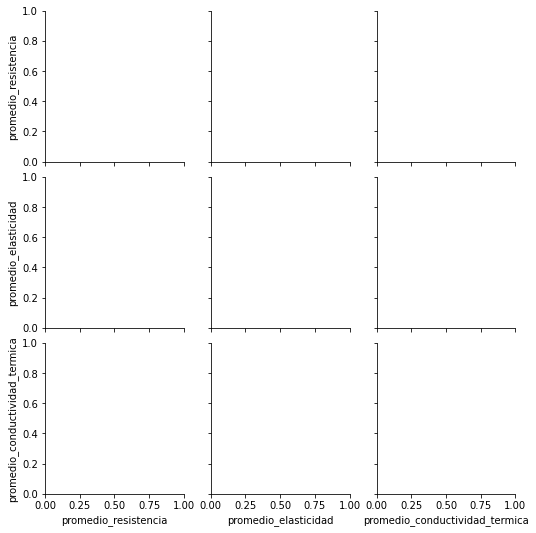

---------------------------------------------------------------------------
KeyError                                  Traceback (most recent call last)
File /databricks/python/lib/python3.9/site-packages/pandas/core/indexes/base.py:3621, in Index.get_loc(self, key, method, tolerance)
   3620 try:
-> 3621     return self._engine.get_loc(casted_key)
   3622 except KeyError as err:

File /databricks/python/lib/python3.9/site-packages/pandas/_libs/index.pyx:136, in pandas._libs.index.IndexEngine.get_loc()

File /databricks/python/lib/python3.9/site-packages/pandas/_libs/index.pyx:163, in pandas._libs.index.IndexEngine.get_loc()

File pandas/_libs/hashtable_class_helper.pxi:5198, in pandas._libs.hashtable.PyObjectHashTable.get_item()

File pandas/_libs/hashtable_class_helper.pxi:5206, in pandas._libs.hashtable.PyObjectHashTable.get_item()

KeyError: 'promedio_resistencia'

The above exception was the direct cause of the following exception:

KeyError                                  Traceba

In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convertir el DataFrame de Spark a Pandas
df_silver_pd = df_silver.toPandas()

# Mostrar las primeras filas del DataFrame
print("DataFrame df_silver:")
print(df_silver_pd.head())

# Mostrar resumen estadístico del DataFrame
print("\nResumen estadístico de df_silver:")
print(df_silver_pd.describe())

# Crear gráficos de dispersión para identificar relaciones entre variables
sns.pairplot(df_silver_pd, vars=["promedio_resistencia", "promedio_elasticidad", "promedio_conductividad_termica"], hue="nombre")
plt.show()
